# C. High-speed data

In [1]:
import os
import numpy as np

### SELECT DATA
#from config import MRI8_NVF4_10mm_0p0mmVVVV as cfg

os.chdir('../')
from lib.methods import *

fig = Figure_BCVVFC({
                    'font.family':'Times New Roman',
                    'mathtext.fontset':'stix',
                    'font.size':30,
                    })

In [3]:
class MRI8_NVF4_10mm_0p0mmVVVV:
    CSV_FILE_DIR = './data/VF_FVF_DATASETS/CSV/'
    VIDEO_FILE_DIR = './data/VF_FVF_DATASETS/VIDEO/'
    DATA_NAME = 'MRI8_NVF4_10mm_0p0mmVVVV'
    CSV_ADDITIONAL_PATH = ''
    SAMPLE_SPAN = [168000, 188000]
    LINE_SCANNING_PARAMS_VF = {'position':[50, 40],'width': 40}
    LINE_SCANNING_PARAMS_FVF = {'position':[70, 80],'width': 70}
    FILTERING_VIDEO_PARAMS_VF = {'kernel_length':10, 'kernel_size':3}
    FILTERING_VIDEO_PARAMS_FVF = {'kernel_length':10, 'kernel_size':3}
    AUTOENCODER_METHOD = 'PCA'
    AUTOENCODER_PARAMS = {'n_principal_components':1}
    PC_DIR = './results/pc_of_video/'

cfg = MRI8_NVF4_10mm_0p0mmVVVV

In [2]:
os.chdir('../')

## Load data

In [4]:
csv_data_list, video_data_list, video_t_data_list = LoadCSVandVIDEOS(
                                                                    csv_path=cfg.CSV_FILE_DIR+cfg.DATA_NAME+'.csv', 
                                                                    data_name_list=['t', 'mic', 'flow'], 
                                                                    sample_span=(160000, 170000), 
                                                                    videos_path_list=[
                                                                                    cfg.VIDEO_FILE_DIR+'VF/'+cfg.DATA_NAME+'.avi',
                                                                                    cfg.VIDEO_FILE_DIR+'FVF/'+cfg.DATA_NAME+'.avi',
                                                                                    ]
                                                                    )
video_vf_data = video_data_list[0]
video_fvf_data = video_data_list[1]

Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI8_NVF4_10mm_0p0mmVVVV.csv
data list | t, mic, flow
Loading video data
file path | ./data/VF_FVF_DATASETS/VIDEO/VF/MRI8_NVF4_10mm_0p0mmVVVV.avi


Loading video data
file path | ./data/VF_FVF_DATASETS/VIDEO/FVF/MRI8_NVF4_10mm_0p0mmVVVV.avi


## Preprocess

In [5]:
pp = PreProcessing(
                data=csv_data_list[1], ### mic data
                t_data=csv_data_list[0], ### mic t data
                video_data_list=video_data_list, 
                video_t_data_list=video_t_data_list
                )
pp.filter()
pp.linescanning_video(params_list = [cfg.LINE_SCANNING_PARAMS_VF, cfg.LINE_SCANNING_PARAMS_FVF])

video_vf_kymogram_data =  pp.video_data_list[0]
video_fvf_kymogram_data =  pp.video_data_list[1]
video_vf_t_data = pp.video_t_data_list[0]
video_fvf_t_data = pp.video_t_data_list[1]

## Figure

In [13]:
class Figure():

    def __init__(self, rcParams_dict):
        for key in rcParams_dict.keys():
            plt.rcParams[str(key)] = rcParams_dict[str(key)]   

    def plt_snapshot(self,
                    data, t_data, scanline=False, position=[80, 80], width=70, c_line='r', lw_line=4, start=10, step=20, start_t_is_0=True,
                    title='Ventricular Fold',
                    figsize=(30, 2), n_shots=12, wspace=0.1, aspect=1.0,
                    gamma=0.3,
                    panel = '(a)', panel_xy=(0.08, 1.), panel_fontsize=40,
                    save_filename=None):
        if gamma!=1:
            data = gamma_correction(data, gamma)
        
        fig = plt.figure(figsize=figsize)
        spec = gridspec.GridSpec(ncols=n_shots, nrows=1,
                         wspace=wspace
                         )
        for i in range(n_shots):
            ax = fig.add_subplot(spec[i])
            if i==0:
                ax.set_title(title, loc='left')
            ax.imshow(np.rot90(data[start+i*step], -1), cmap='Greys_r', norm=Normalize(vmin=0, vmax=255), aspect=aspect)
            if scanline!=False:
                if i==0:
                    ax.plot([position[0], position[0]], [position[1]-width/2, position[1]+width/2], color=c_line, linewidth=lw_line)
            ax.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
            if i==0:
                fig.text(ax.get_position().x1-panel_xy[0], ax.get_position().y1-panel_xy[1], s=panel, fontsize=panel_fontsize)
            if start_t_is_0:
                ax.set_xlabel('{:.1f}'.format(i*step*(t_data[1]-t_data[0])*1000)+' [ms]')
            else:
                ax.set_xlabel('{:.1f}'.format(t_data[start+i*step]*1000)+' [ms]')
        plt.tight_layout()
        if save_filename==None:
            plt.show()
        else:
            plt.savefig(save_filename, bbox_inches="tight")

In [14]:
fig = Figure({
                    'font.family':'Times New Roman',
                    'mathtext.fontset':'stix',
                    'font.size':30,
                    })

C:\Users\rm0179rx\AppData\Local\Temp\ipykernel_20656\725129907.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


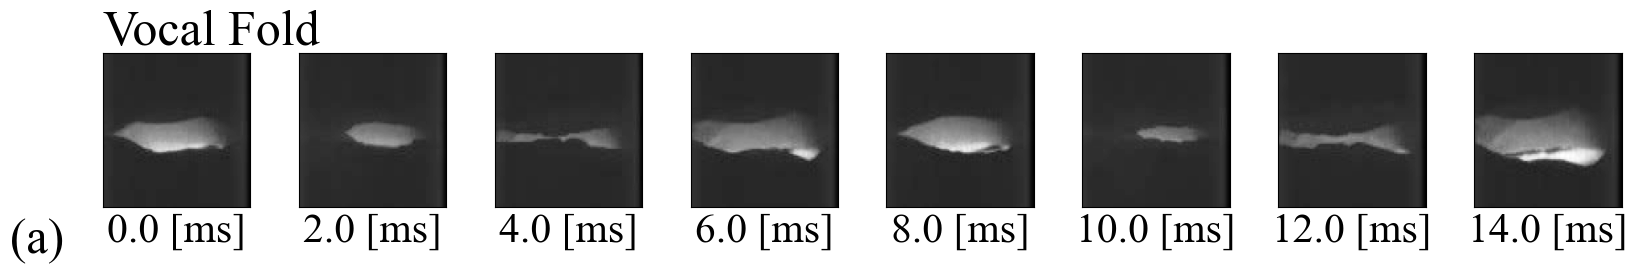

In [36]:
fig.plt_snapshot(data=video_vf_data, t_data=video_vf_t_data, scanline=False, position=[80, 80], width=70, c_line='r', lw_line=4, start=10, step=20, start_t_is_0=True,
                    title='Vocal Fold',
                    figsize=(20, 2), n_shots=8, wspace=0.1, aspect=1.3,
                    gamma=1,
                    panel = '(a)', panel_xy=(0.12, 1.), panel_fontsize=35,
                    save_filename=None)

C:\Users\rm0179rx\AppData\Local\Temp\ipykernel_20656\725129907.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


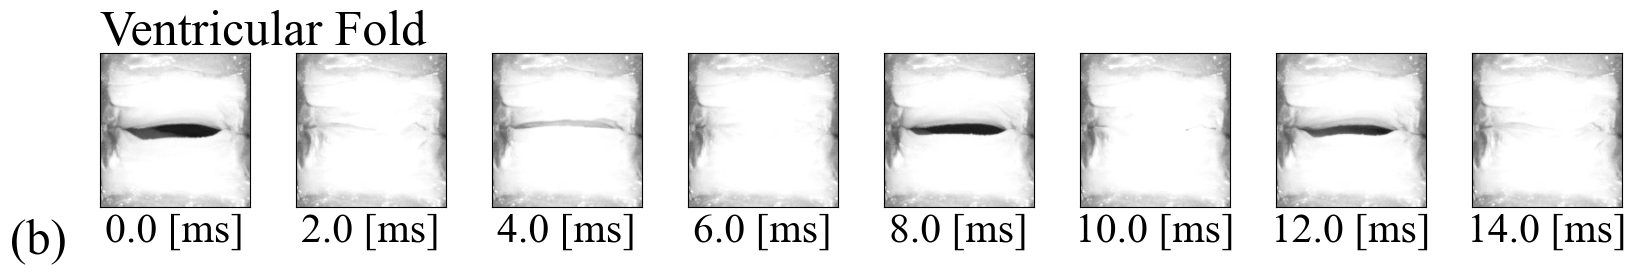

In [37]:
fig.plt_snapshot(data=video_fvf_data, t_data=video_fvf_t_data, scanline=False, position=[80, 80], width=70, c_line='r', lw_line=4, start=10, step=20, start_t_is_0=True,
                    title='Ventricular Fold',
                    figsize=(20, 2), n_shots=8, wspace=0.1, aspect=1.0,
                    gamma=1,
                    panel = '(b)', panel_xy=(0.12, 1.), panel_fontsize=35,
                    save_filename=None)

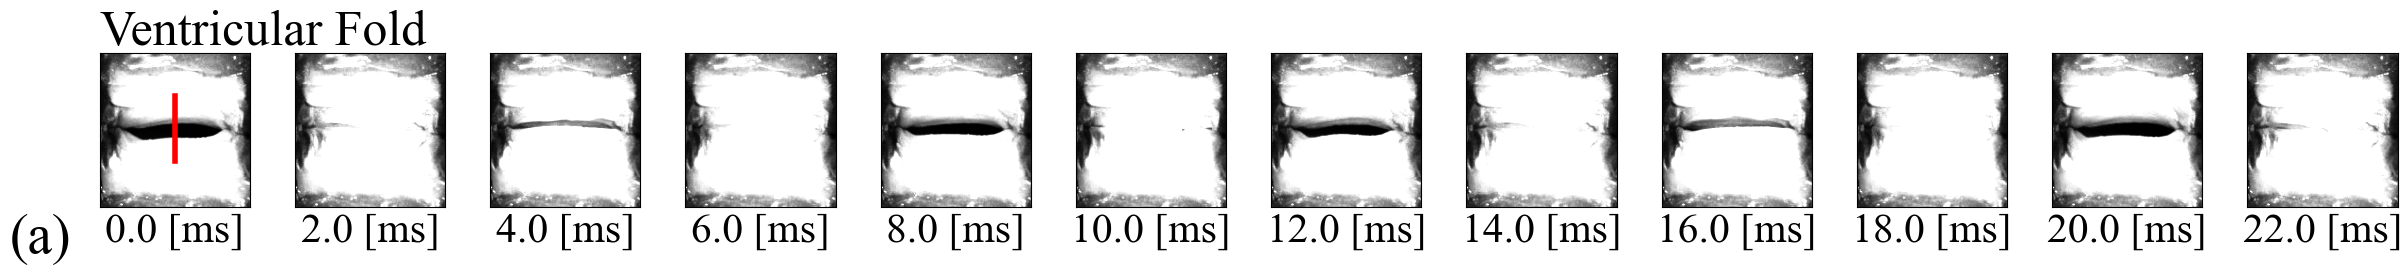

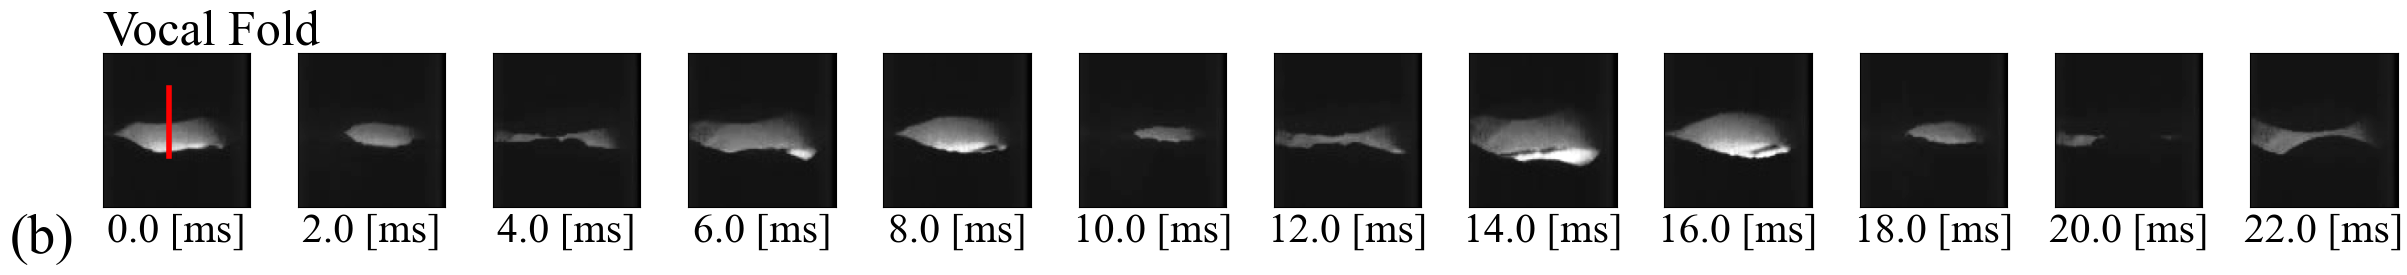

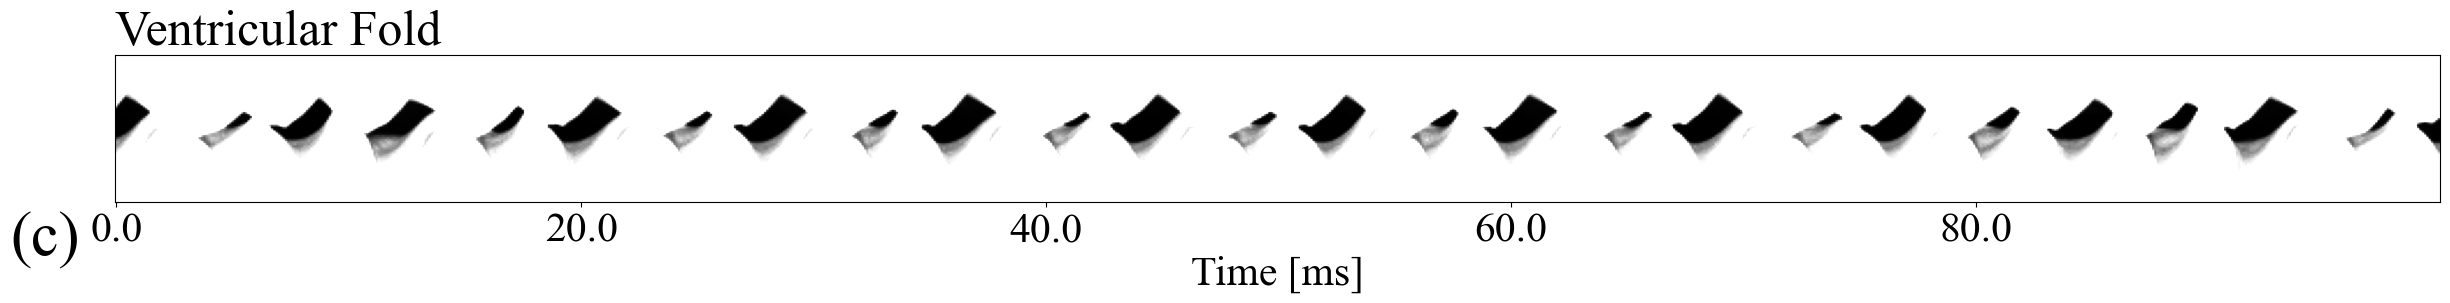

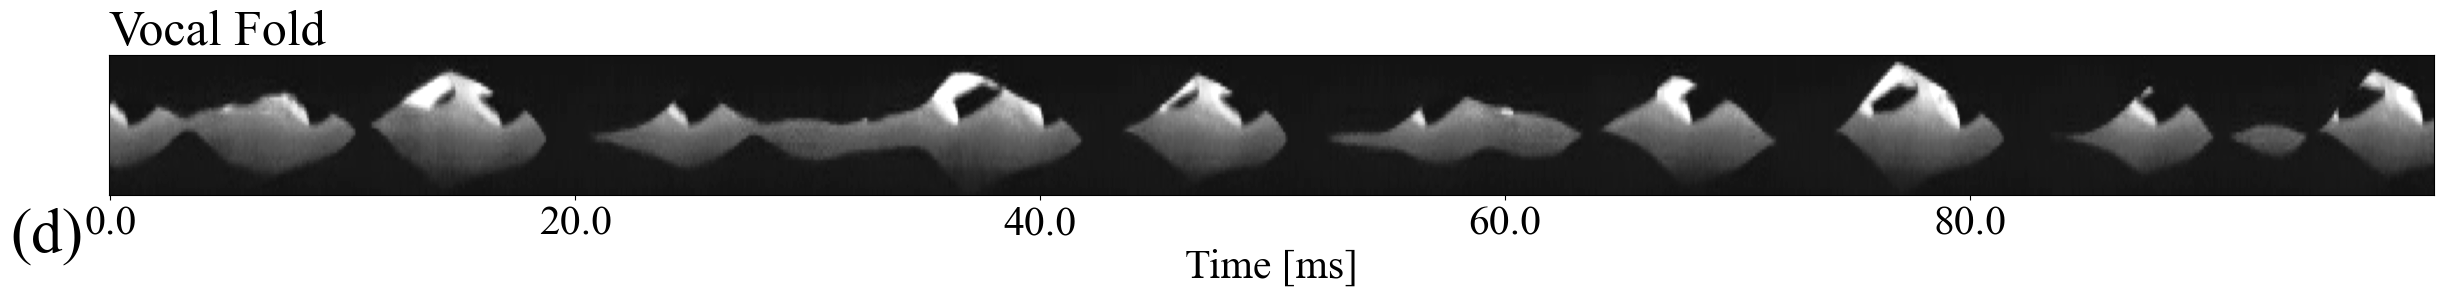

In [6]:
fig.figure04_snapshots(
                    data=video_fvf_data, t_data=video_fvf_t_data,position=[80, 80], width=70, c_line='r', lw_line=4, start=10, step=20, start_t_is_0=True,
                    title='Ventricular Fold',
                    figsize=(30, 2), n_shots=12, wspace=0.1, aspect=1.0,
                    gamma=0.3,
                    panel = '(a)', panel_xy=(0.08, 1.), panel_fontsize=40, 
                    save_filename='./results/figure/figure04-1.eps'
                    )

fig.figure04_snapshots(
                    data=video_vf_data, t_data=video_vf_t_data, position=[50, 40], width=40,  c_line='r', lw_line=4, start=10, step=20, start_t_is_0=True,
                    title='Vocal Fold',
                    figsize=(30, 2), n_shots=12, wspace=0.1, aspect=1.3,
                    gamma=0.7,
                    panel = '(b)', panel_xy=(0.08, 1.), panel_fontsize=40, 
                    save_filename='./results/figure/figure04-2.eps'
                    )